In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading'

In [3]:
file=f'{bigDir}\signals_combined_v2.csv'

In [4]:
data=pd.read_csv(file)

# data visualizations 

In [5]:
data=data.drop(columns=['Unnamed: 0'])

In [6]:
data.head()

file original cell name                        movie  \
0  20190625_cell-01.czi           7L-E1(T)  190619-cdc6-dhb-pcna002xy09   
1  20190625_cell-02.czi           7L-E2(B)  190619-cdc6-dhb-pcna002xy09   
2  20190625_cell-03.czi           7L-E2(T)  190619-cdc6-dhb-pcna002xy09   
3  20190625_cell-05.czi              7L-G2  190619-cdc6-dhb-pcna002xy09   
4  20190625_cell-06.czi              7L-G3  190619-cdc6-dhb-pcna002xy09   

  ab1 (heterochromatin)  ab1 ch  ab2 ch  DAPI ch  DIC ch category  \
0                  HP1B       1       2        3     4.0  earlyG1   
1                  HP1B       1       2        3     4.0  earlyG1   
2                  HP1B       1       2        3     4.0  earlyG1   
3                  HP1B       1       2        3     4.0       G2   
4                  HP1B       1       2        3     4.0       G2   

  physical age [min]  ...  outer_DAPI_total nuc_DAPI_het  inner_DAPI_het  \
0                 30  ...        7162938559   2603414820      1697958740   
1                110  ...        7431493902   2648661524      1905903649   
2                110  ...        7047608358   2521721709      1686519354   
3               1160  ...       12804850980   5093678518      3586438085   
4               1120  ...       13605913882   5393419582      3580233032   

  outer_DAPI_het  nuc_DAPI_eu inner_DAPI_eu  outer_DAPI_eu        day  \
0      905456080   8884586027    3279220769     5605365258  d20190625   
1      742757875   9380929412    3599108812     5781820600  d20190625   
2      835202355   8834283118    3324641538     5509641580  d20190625   
3     1507240433  17937429925    8422452590     9514977335  d20190625   
4     1813186550  19119940517    9043613417    10076327100  d20190625   

       p_age  mol_age_mod  
0   0.666667     0.287517  
1   2.000000     0.431866  
2   2.000000     0.499777  
3  19.500000     1.479820  
4  18.833333     1.517313  

[5 rows x 46 columns]

In [7]:
data.loc[(data['ab1 (heterochromatin)']=='HP1beta'),'ab1 (heterochromatin)']='HP1B'

In [8]:
datasel=data.loc[((data.decon==True) & (data['ab1 (heterochromatin)']=='HP1B')),:].copy()

In [9]:
datand=data.loc[((data.decon==False) & (data['ab1 (heterochromatin)']=='HP1B')),:].copy()

# deconvolved cells

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


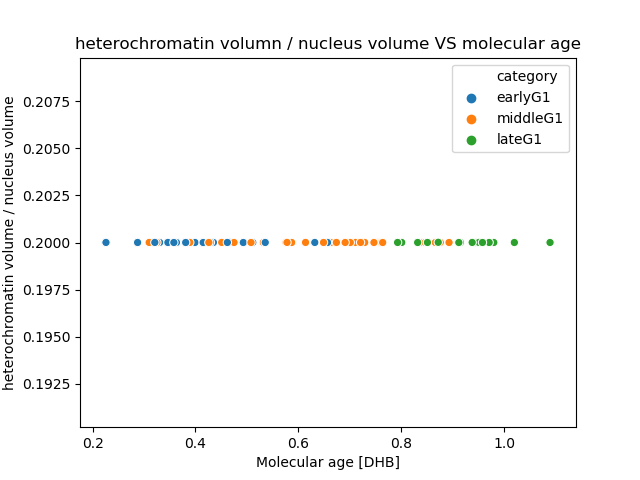

Text(0.5, 1.0, 'heterochromatin volumn / nucleus volume VS molecular age')

In [10]:
%matplotlib notebook
datasel['temp']=datasel.nuc_vol_het/datasel.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volumn / nucleus volume VS molecular age')

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


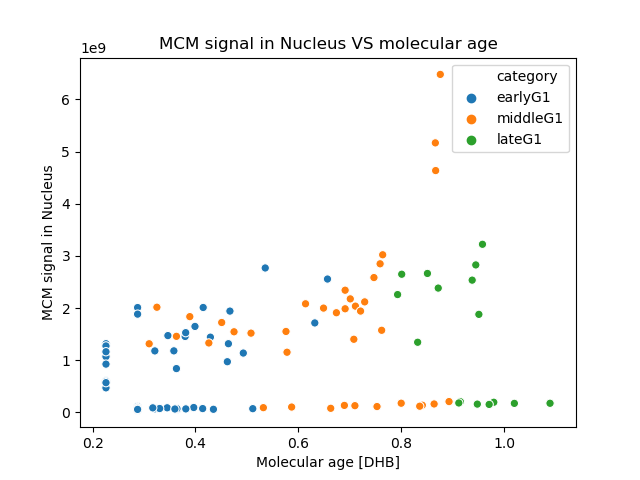

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [11]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age')

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


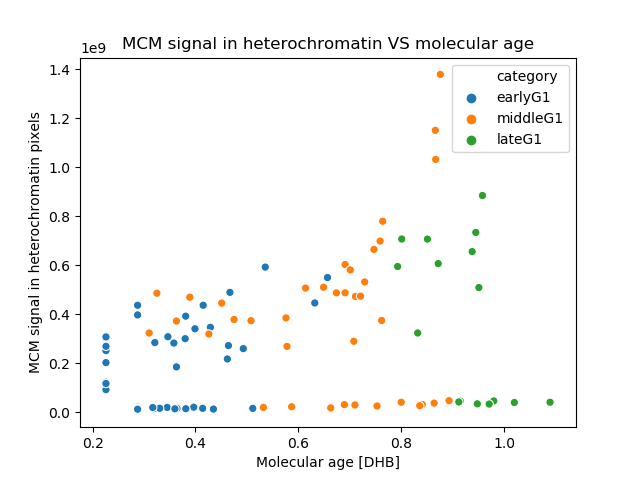

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age')

In [12]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age')

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


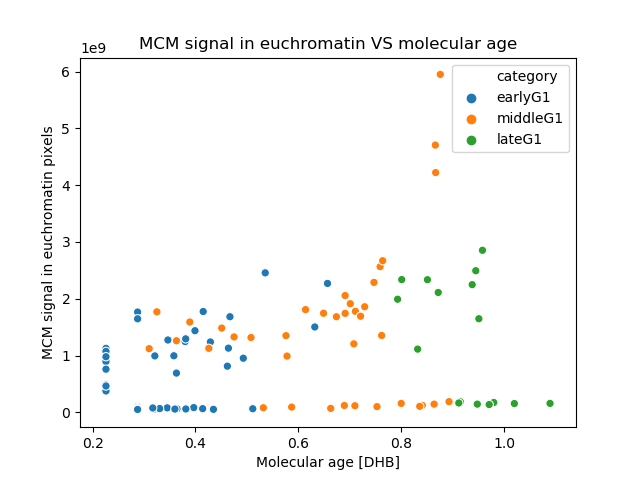

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age')

In [13]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age')

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


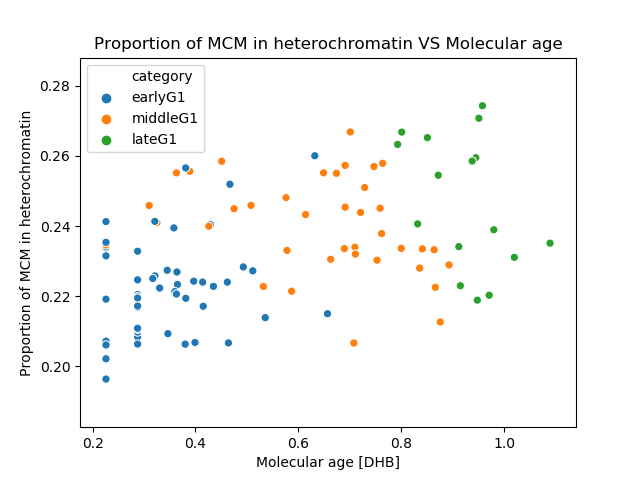

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age')

In [14]:
%matplotlib notebook
datasel['temp']=datasel.nuc_mcm_het/datasel.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age')

## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


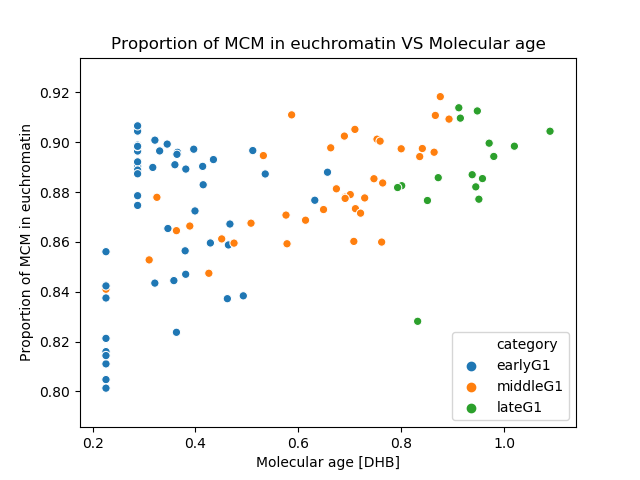

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age')

In [15]:
%matplotlib notebook
datasel['temp']=datasel.nuc_mcm_eu/datasel.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age')

## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


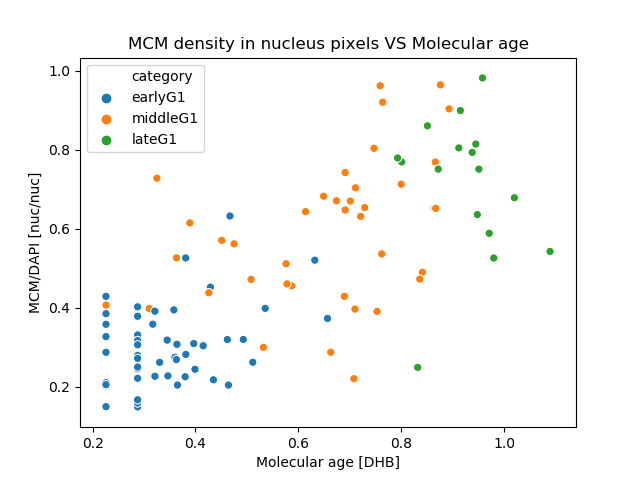

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age')

In [16]:
%matplotlib notebook
datasel['temp']=datasel.nuc_mcm_total/datasel.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age')

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


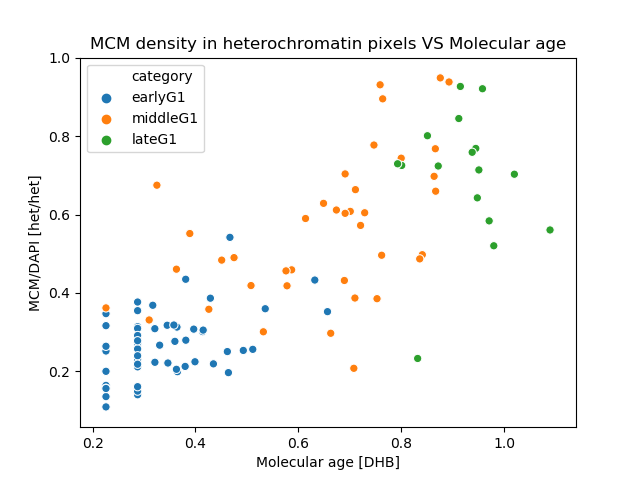

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [17]:
%matplotlib notebook
datasel['temp']=datasel.nuc_mcm_het/datasel.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


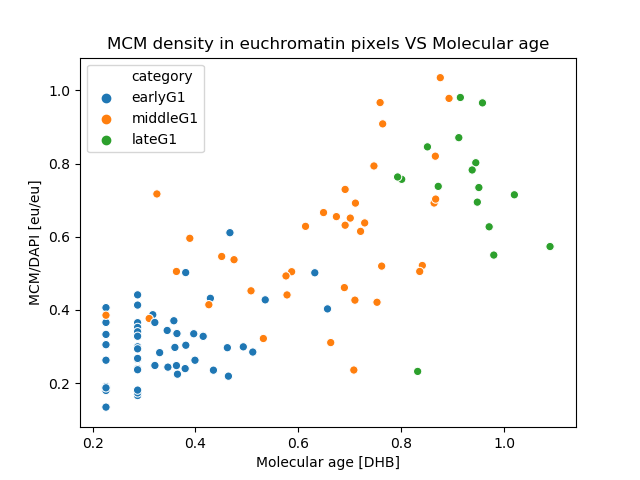

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [18]:
%matplotlib notebook
datasel['temp']=datasel.nuc_mcm_eu/datasel.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

# inner core of the nucleus

## 10.	How is heterochromtin/nucleus inner volume changing with molecular age?

<IPython.core.display.Javascript object>


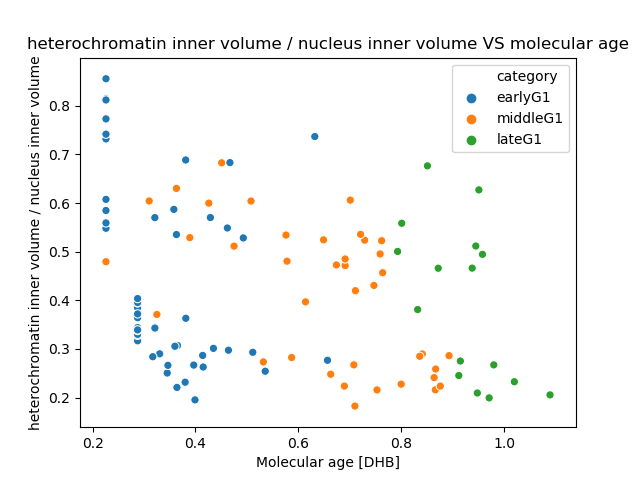

Text(0.5, 1.0, 'heterochromatin inner volume / nucleus inner volume VS molecular age')

In [19]:
%matplotlib notebook
datasel['temp']=datasel.inner_vol_het/datasel.inner_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin inner volume / nucleus inner volume')
plt.title('heterochromatin inner volume / nucleus inner volume VS molecular age')

## 11. 	How is MCM signal in inner core changing with molecular age? 

<IPython.core.display.Javascript object>


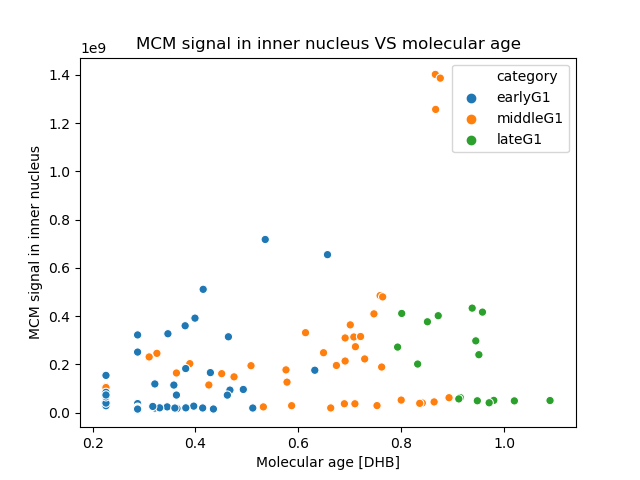

Text(0.5, 1.0, 'MCM signal in inner nucleus VS molecular age')

In [20]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_total',data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner nucleus')
plt.title('MCM signal in inner nucleus VS molecular age')

## 12. 	How is MCM signal changing in inner heterochromatin with molecular age?

<IPython.core.display.Javascript object>


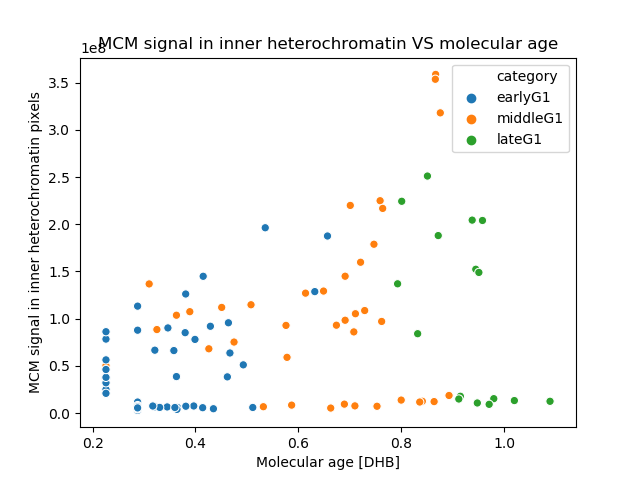

Text(0.5, 1.0, 'MCM signal in inner heterochromatin VS molecular age')

In [21]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_het',data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner heterochromatin pixels')
plt.title('MCM signal in inner heterochromatin VS molecular age')

## 13. 	How is MCM signal changing in inner euchromatin with molecular age?

<IPython.core.display.Javascript object>


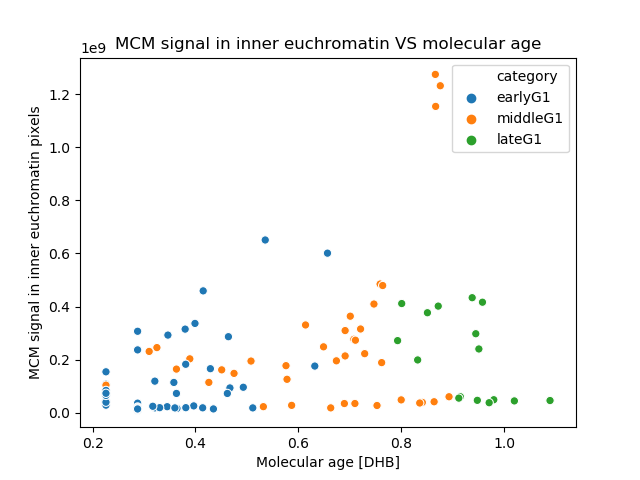

Text(0.5, 1.0, 'MCM signal in inner euchromatin VS molecular age')

In [22]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_eu',data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner euchromatin pixels')
plt.title('MCM signal in inner euchromatin VS molecular age')

## 14.	How does a proportion of MCM loaded in inner heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


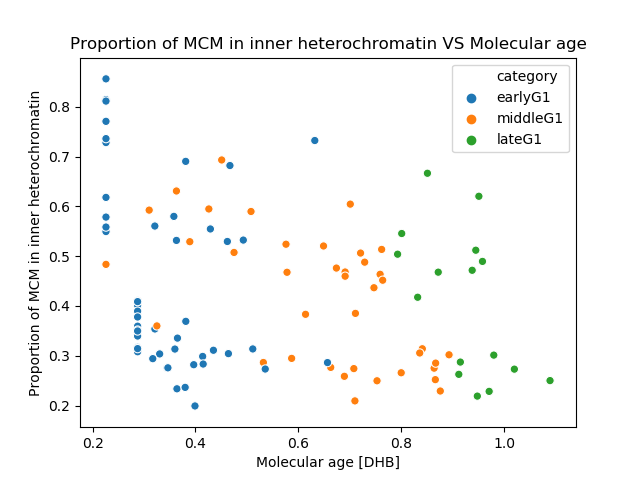

Text(0.5, 1.0, 'Proportion of MCM in inner heterochromatin VS Molecular age')

In [23]:
%matplotlib notebook
datasel['temp']=datasel.inner_mcm_het/datasel.inner_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in inner heterochromatin')
plt.title('Proportion of MCM in inner heterochromatin VS Molecular age')

## 15.	How does a proportion of MCM loaded in inner euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


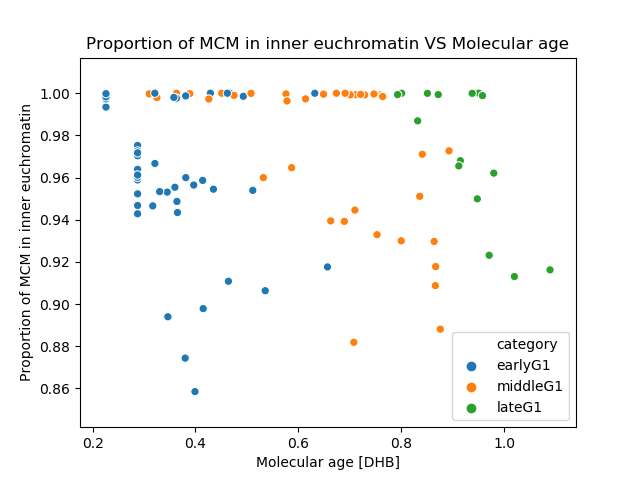

Text(0.5, 1.0, 'Proportion of MCM in inner euchromatin VS Molecular age')

In [24]:
%matplotlib notebook
datasel['temp']=datasel.inner_mcm_eu/datasel.inner_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in inner euchromatin')
plt.title('Proportion of MCM in inner euchromatin VS Molecular age')

## 16.	How does MCM/DAPI in inner core changes in molecular time?

<IPython.core.display.Javascript object>


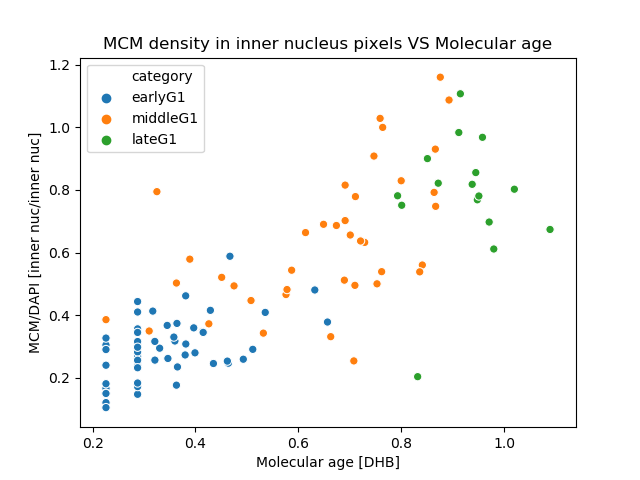

Text(0.5, 1.0, 'MCM density in inner nucleus pixels VS Molecular age')

In [25]:
%matplotlib notebook
datasel['temp']=datasel.inner_mcm_total/datasel.inner_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [inner nuc/inner nuc]')
plt.title('MCM density in inner nucleus pixels VS Molecular age')

## 17.	How does MCM/DAPI changes in inner heterochromatin molecular time?

<IPython.core.display.Javascript object>


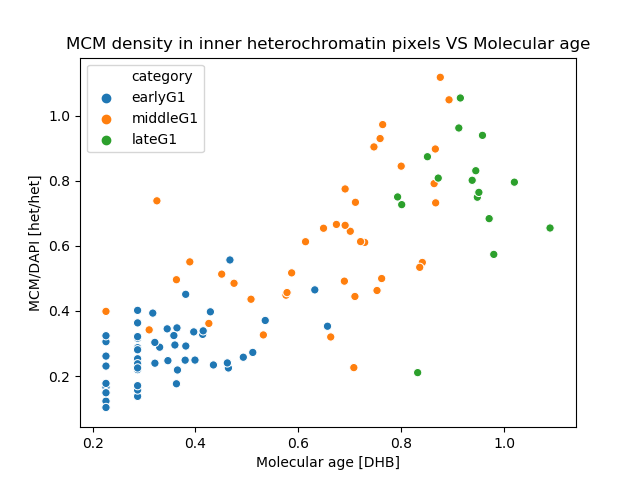

Text(0.5, 1.0, 'MCM density in inner heterochromatin pixels VS Molecular age')

In [26]:
%matplotlib notebook
datasel['temp']=datasel.inner_mcm_het/datasel.inner_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in inner heterochromatin pixels VS Molecular age')

## 18. 	How does MCM/DAPI changes in inner euterochromatin molecular time?

<IPython.core.display.Javascript object>


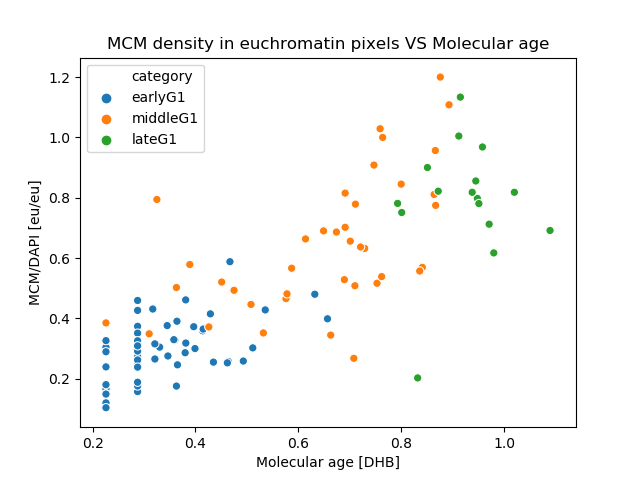

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [27]:
%matplotlib notebook
datasel['temp']=datasel.inner_mcm_eu/datasel.inner_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

# outer shell of the nucleus

## 19.	How is heterochromtin/nucleus outer volume changing with molecular age?

<IPython.core.display.Javascript object>


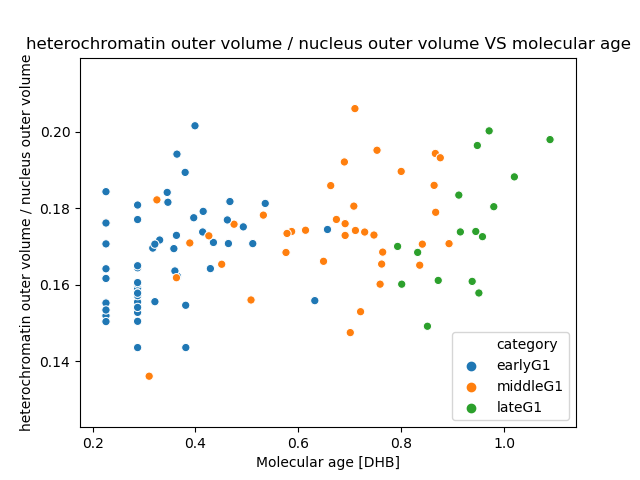

Text(0.5, 1.0, 'heterochromatin outer volume / nucleus outer volume VS molecular age')

In [28]:
%matplotlib notebook
datasel['temp']=datasel.outer_vol_het/datasel.outer_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin outer volume / nucleus outer volume')
plt.title('heterochromatin outer volume / nucleus outer volume VS molecular age')

## 20. 	How is MCM signal in outer core changing with molecular age? 

<IPython.core.display.Javascript object>


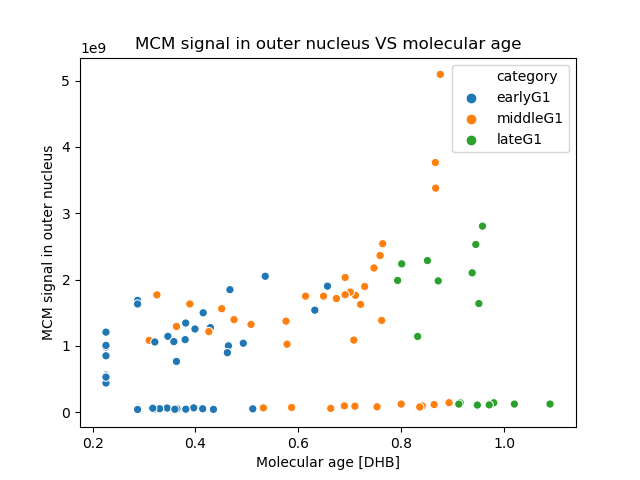

Text(0.5, 1.0, 'MCM signal in outer nucleus VS molecular age')

In [29]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_total',data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer nucleus')
plt.title('MCM signal in outer nucleus VS molecular age')

## 21. 	How is MCM signal changing in outer heterochromatin with molecular age?

<IPython.core.display.Javascript object>


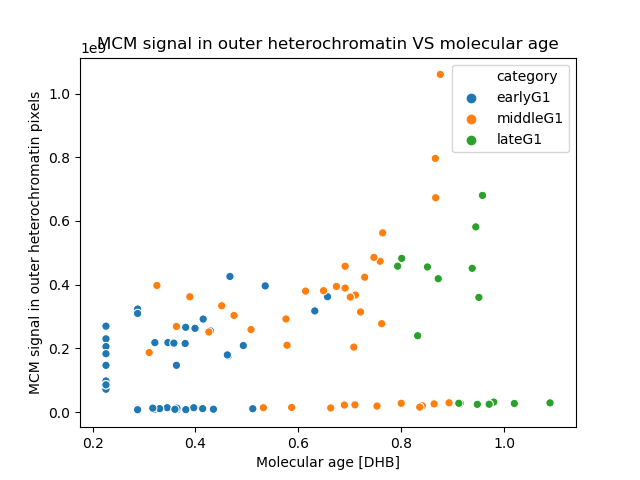

Text(0.5, 1.0, 'MCM signal in outer heterochromatin VS molecular age')

In [30]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_het',data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer heterochromatin pixels')
plt.title('MCM signal in outer heterochromatin VS molecular age')

## 22. 	How is MCM signal changing in outer euchromatin with molecular age?

<IPython.core.display.Javascript object>


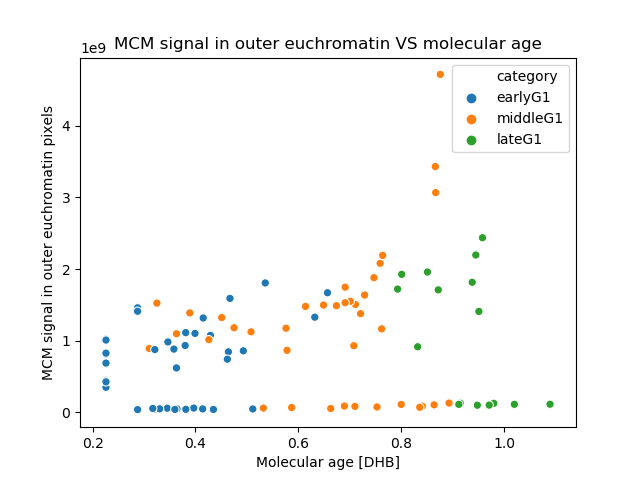

Text(0.5, 1.0, 'MCM signal in outer euchromatin VS molecular age')

In [31]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_eu',data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer euchromatin pixels')
plt.title('MCM signal in outer euchromatin VS molecular age')

## 23.	How does a proportion of MCM loaded in outer heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


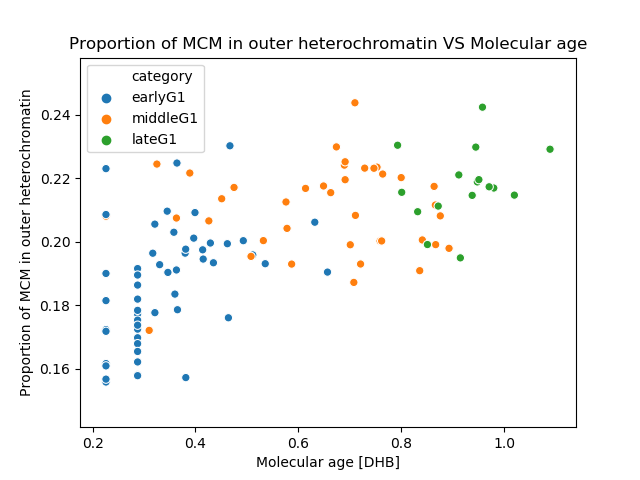

Text(0.5, 1.0, 'Proportion of MCM in outer heterochromatin VS Molecular age')

In [32]:
%matplotlib notebook
datasel['temp']=datasel.outer_mcm_het/datasel.outer_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in outer heterochromatin')
plt.title('Proportion of MCM in outer heterochromatin VS Molecular age')

## 24.	How does a proportion of MCM loaded in outer euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


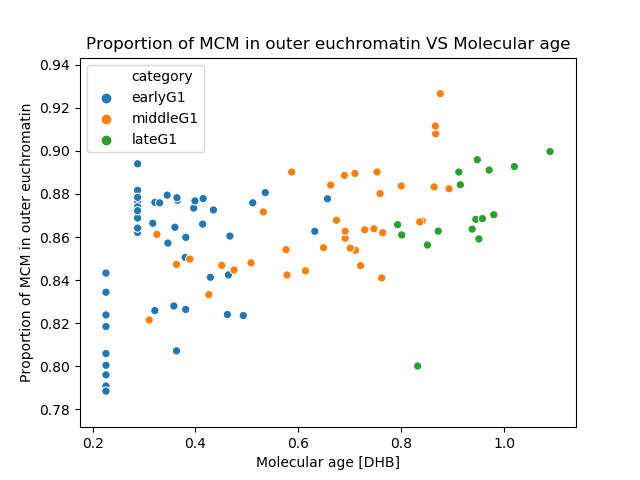

Text(0.5, 1.0, 'Proportion of MCM in outer euchromatin VS Molecular age')

In [33]:
%matplotlib notebook
datasel['temp']=datasel.outer_mcm_eu/datasel.outer_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in outer euchromatin')
plt.title('Proportion of MCM in outer euchromatin VS Molecular age')

## 25.	How does MCM/DAPI in outer shell changes in molecular time?

<IPython.core.display.Javascript object>


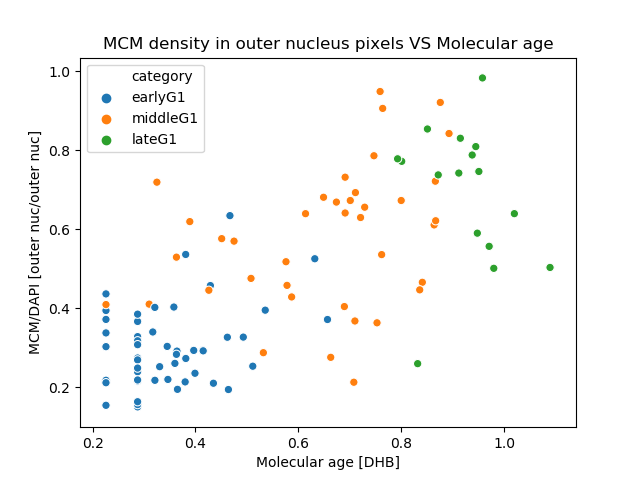

Text(0.5, 1.0, 'MCM density in outer nucleus pixels VS Molecular age')

In [34]:
%matplotlib notebook
datasel['temp']=datasel.outer_mcm_total/datasel.outer_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [outer nuc/outer nuc]')
plt.title('MCM density in outer nucleus pixels VS Molecular age')

## 26.	How does MCM/DAPI changes in outer heterochromatin molecular time?

<IPython.core.display.Javascript object>


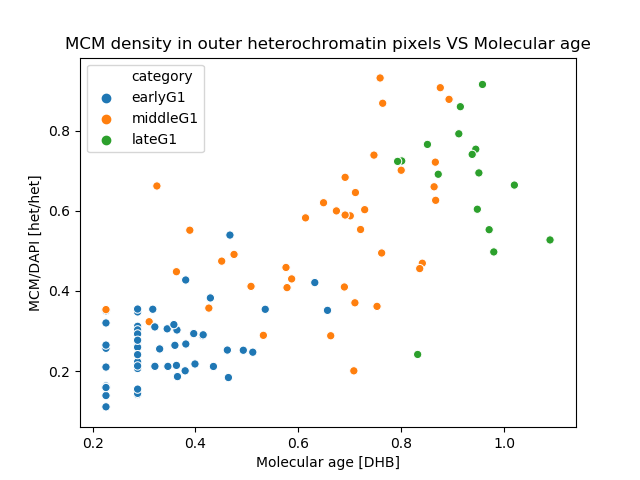

Text(0.5, 1.0, 'MCM density in outer heterochromatin pixels VS Molecular age')

In [35]:
%matplotlib notebook
datasel['temp']=datasel.outer_mcm_het/datasel.outer_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in outer heterochromatin pixels VS Molecular age')

## 27. 	How does MCM/DAPI changes in outer euterochromatin molecular time?

<IPython.core.display.Javascript object>


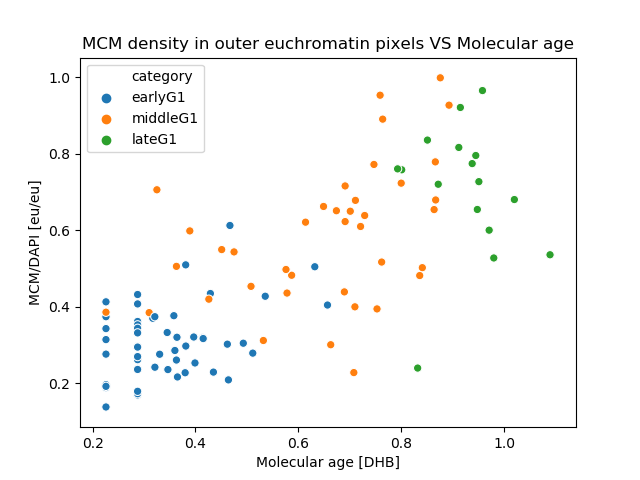

Text(0.5, 1.0, 'MCM density in outer euchromatin pixels VS Molecular age')

In [36]:
%matplotlib notebook
datasel['temp']=datasel.outer_mcm_eu/datasel.outer_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=datasel.loc[((datasel.day!='d20190625') & (datasel.day!='d201907012') &
                                                           ['G1' in x for x in datasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in outer euchromatin pixels VS Molecular age')

# non-deconvolved

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


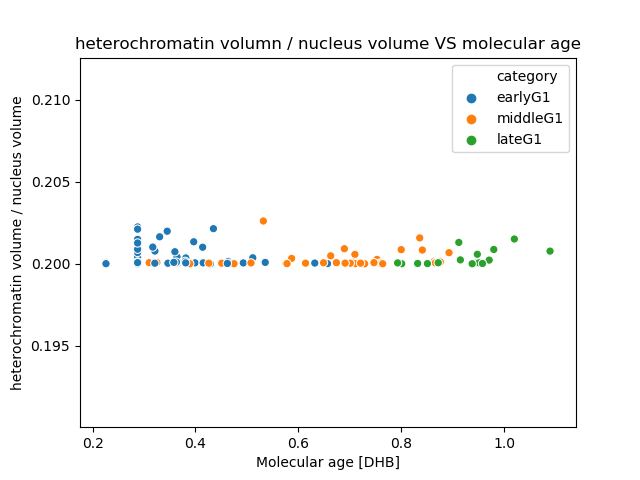

Text(0.5, 1.0, 'heterochromatin volumn / nucleus volume VS molecular age')

In [37]:
%matplotlib notebook
datand['temp']=datand.nuc_vol_het/datand.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volumn / nucleus volume VS molecular age')

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


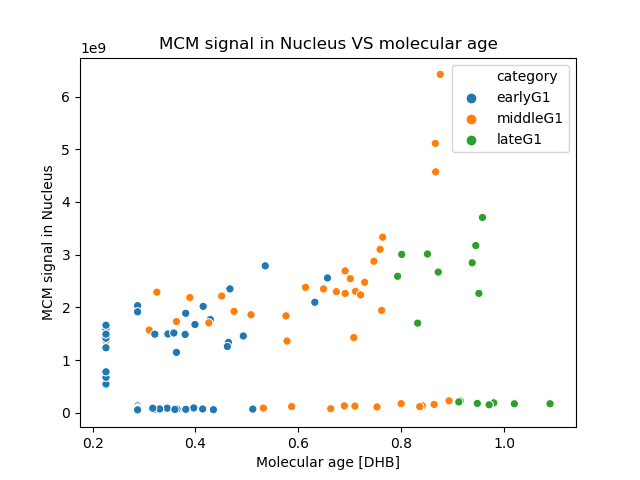

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [38]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age')

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


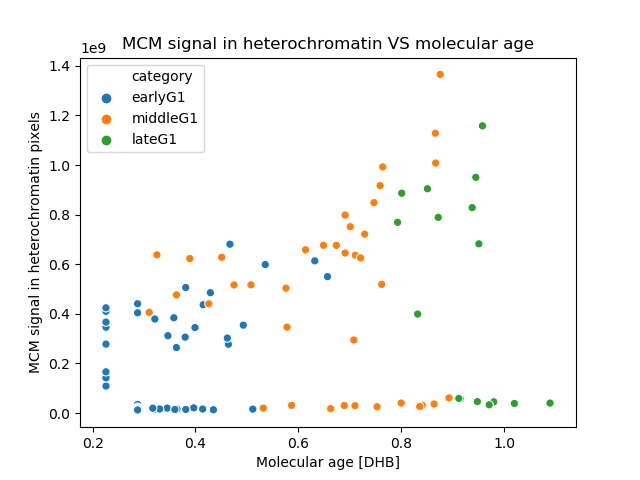

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age')

In [39]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age')

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


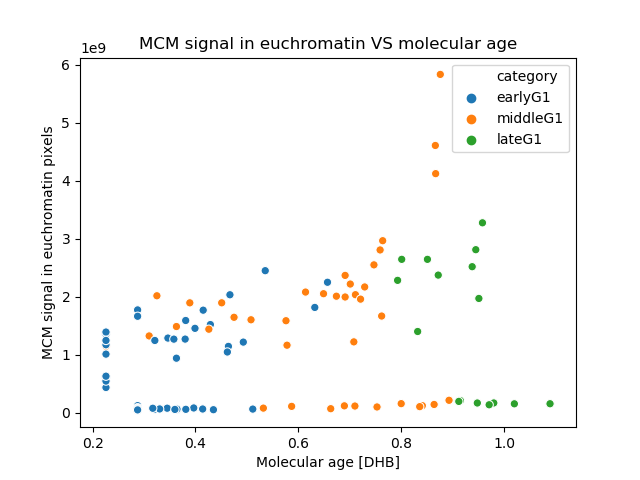

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age')

In [40]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age')

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


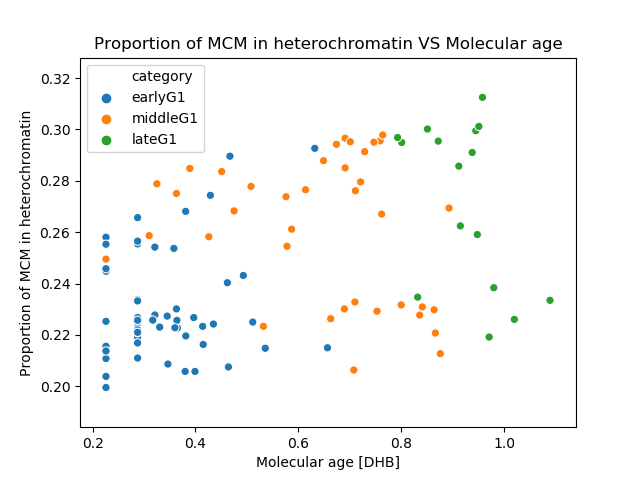

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age')

In [41]:
%matplotlib notebook
datand['temp']=datand.nuc_mcm_het/datand.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age')

## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


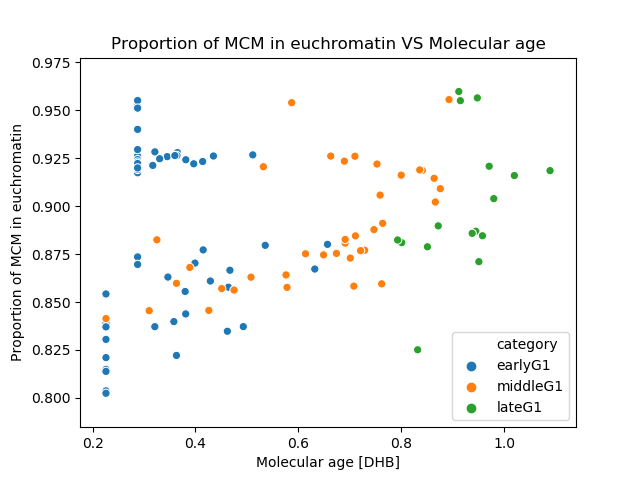

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age')

In [42]:
%matplotlib notebook
datand['temp']=datand.nuc_mcm_eu/datand.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age')

## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


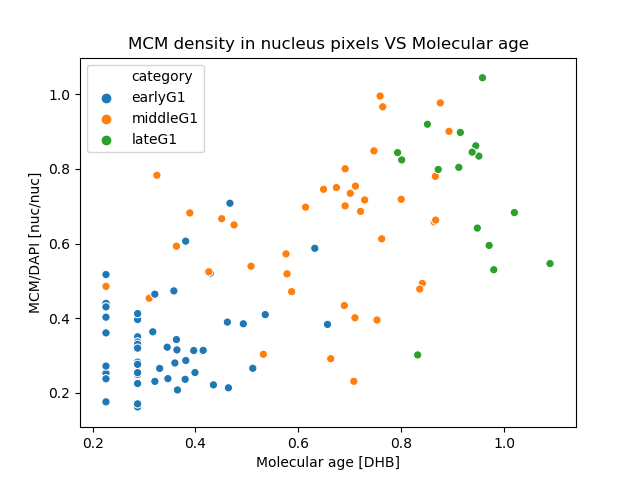

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age')

In [43]:
%matplotlib notebook
datand['temp']=datand.nuc_mcm_total/datand.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age')

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


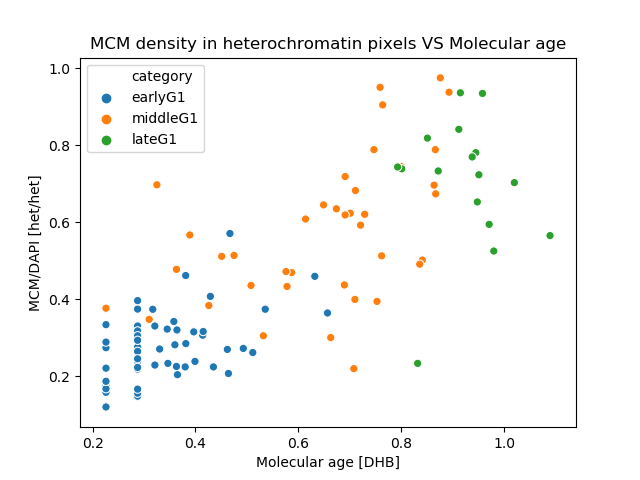

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [44]:
%matplotlib notebook
datand['temp']=datand.nuc_mcm_het/datand.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


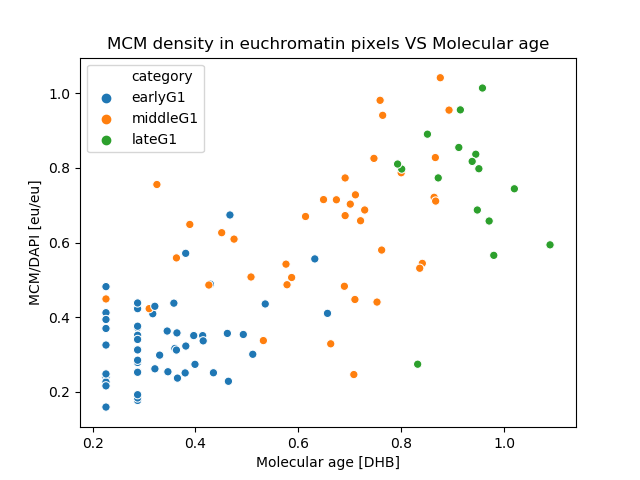

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [45]:
%matplotlib notebook
datand['temp']=datand.nuc_mcm_eu/datand.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

# inner core of the nucleus

## 10.	How is heterochromtin/nucleus inner volume changing with molecular age?

<IPython.core.display.Javascript object>


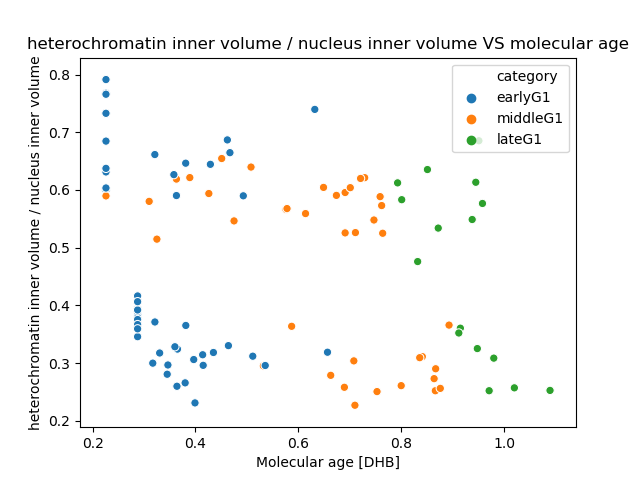

Text(0.5, 1.0, 'heterochromatin inner volume / nucleus inner volume VS molecular age')

In [46]:
%matplotlib notebook
datand['temp']=datand.inner_vol_het/datand.inner_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin inner volume / nucleus inner volume')
plt.title('heterochromatin inner volume / nucleus inner volume VS molecular age')

## 11. 	How is MCM signal in inner core changing with molecular age? 

<IPython.core.display.Javascript object>


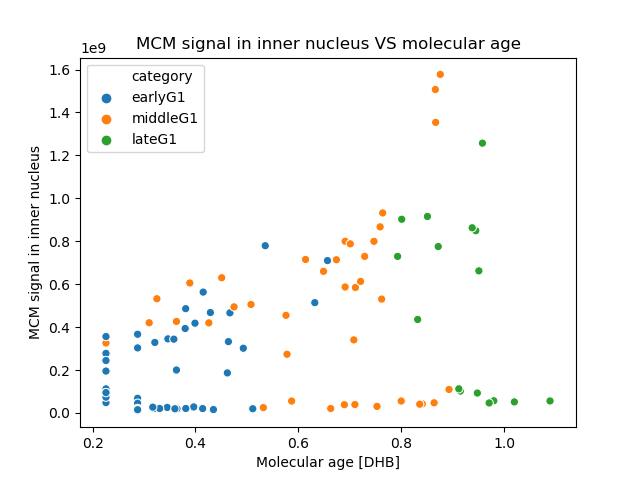

Text(0.5, 1.0, 'MCM signal in inner nucleus VS molecular age')

In [47]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_total',data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner nucleus')
plt.title('MCM signal in inner nucleus VS molecular age')

## 12. 	How is MCM signal changing in inner heterochromatin with molecular age?

<IPython.core.display.Javascript object>


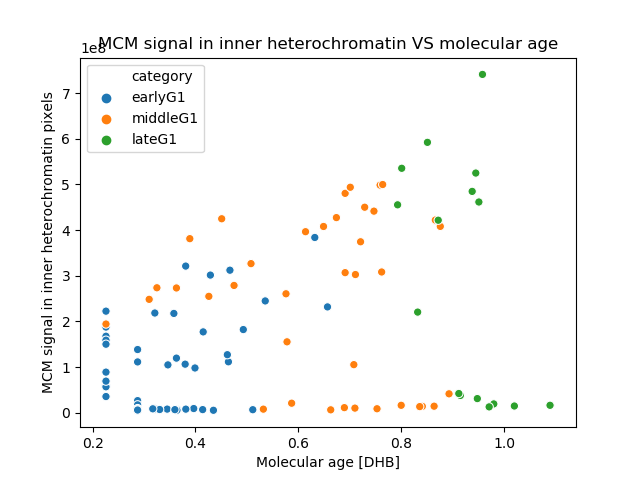

Text(0.5, 1.0, 'MCM signal in inner heterochromatin VS molecular age')

In [48]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_het',data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner heterochromatin pixels')
plt.title('MCM signal in inner heterochromatin VS molecular age')

## 13. 	How is MCM signal changing in inner euchromatin with molecular age?

<IPython.core.display.Javascript object>


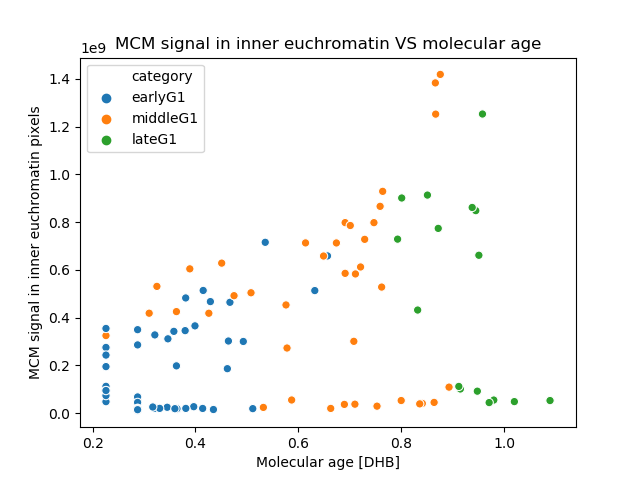

Text(0.5, 1.0, 'MCM signal in inner euchromatin VS molecular age')

In [49]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_eu',data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner euchromatin pixels')
plt.title('MCM signal in inner euchromatin VS molecular age')

## 14.	How does a proportion of MCM loaded in inner heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


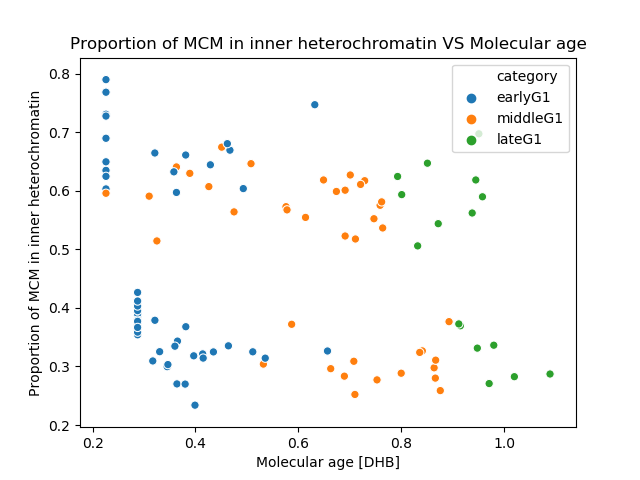

Text(0.5, 1.0, 'Proportion of MCM in inner heterochromatin VS Molecular age')

In [50]:
%matplotlib notebook
datand['temp']=datand.inner_mcm_het/datand.inner_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in inner heterochromatin')
plt.title('Proportion of MCM in inner heterochromatin VS Molecular age')

## 15.	How does a proportion of MCM loaded in inner euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


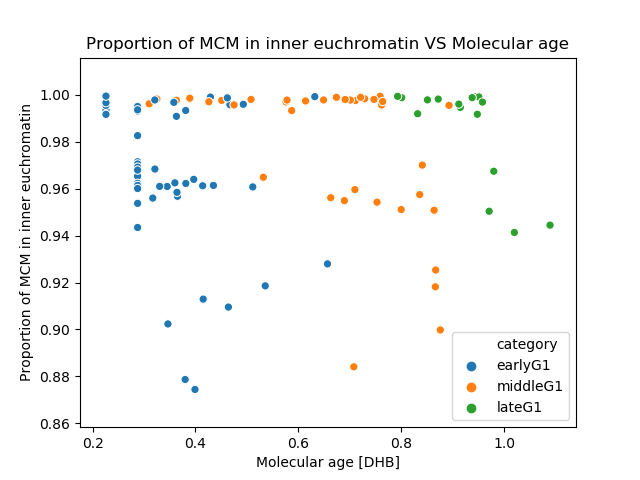

Text(0.5, 1.0, 'Proportion of MCM in inner euchromatin VS Molecular age')

In [51]:
%matplotlib notebook
datand['temp']=datand.inner_mcm_eu/datand.inner_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in inner euchromatin')
plt.title('Proportion of MCM in inner euchromatin VS Molecular age')

## 16.	How does MCM/DAPI in inner core changes in molecular time?

<IPython.core.display.Javascript object>


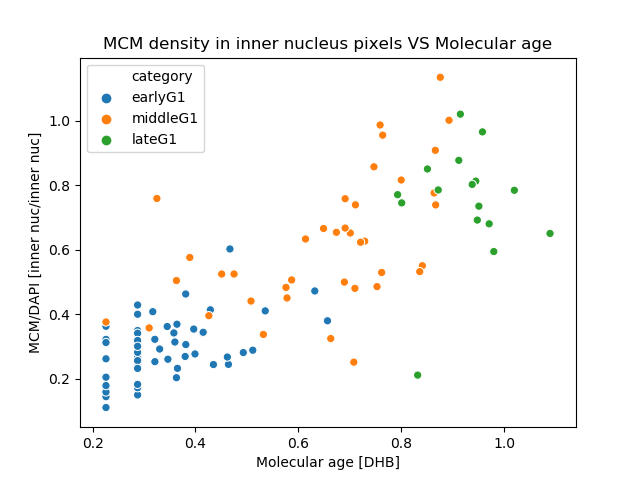

Text(0.5, 1.0, 'MCM density in inner nucleus pixels VS Molecular age')

In [52]:
%matplotlib notebook
datand['temp']=datand.inner_mcm_total/datand.inner_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [inner nuc/inner nuc]')
plt.title('MCM density in inner nucleus pixels VS Molecular age')

## 17.	How does MCM/DAPI changes in inner heterochromatin molecular time?

<IPython.core.display.Javascript object>


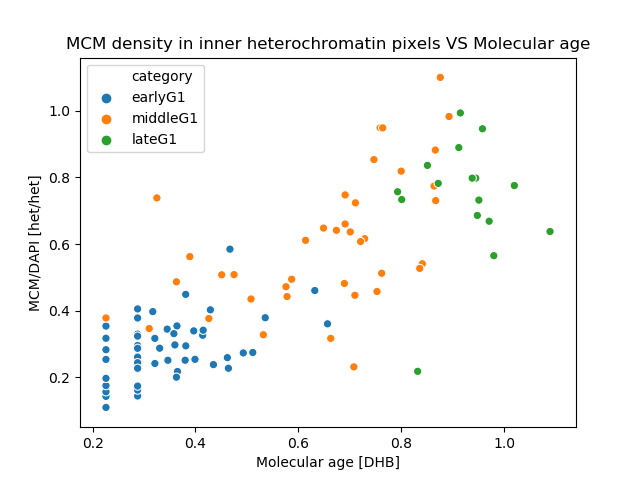

Text(0.5, 1.0, 'MCM density in inner heterochromatin pixels VS Molecular age')

In [53]:
%matplotlib notebook
datand['temp']=datand.inner_mcm_het/datand.inner_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in inner heterochromatin pixels VS Molecular age')

## 18. 	How does MCM/DAPI changes in inner euterochromatin molecular time?

<IPython.core.display.Javascript object>


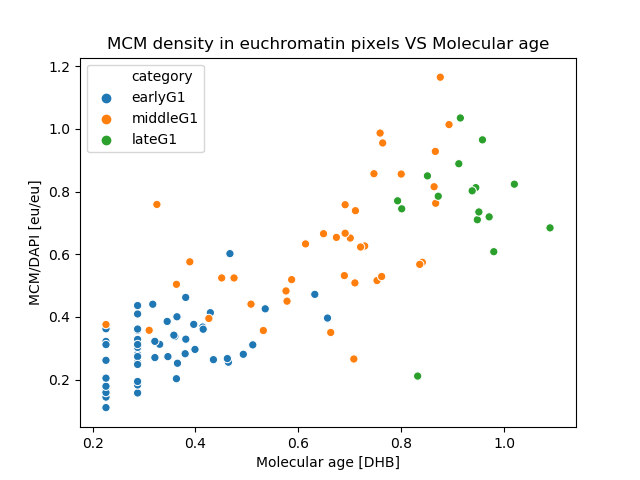

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [54]:
%matplotlib notebook
datand['temp']=datand.inner_mcm_eu/datand.inner_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

# outer shell of the nucleus

## 19.	How is heterochromtin/nucleus outer volume changing with molecular age?

<IPython.core.display.Javascript object>


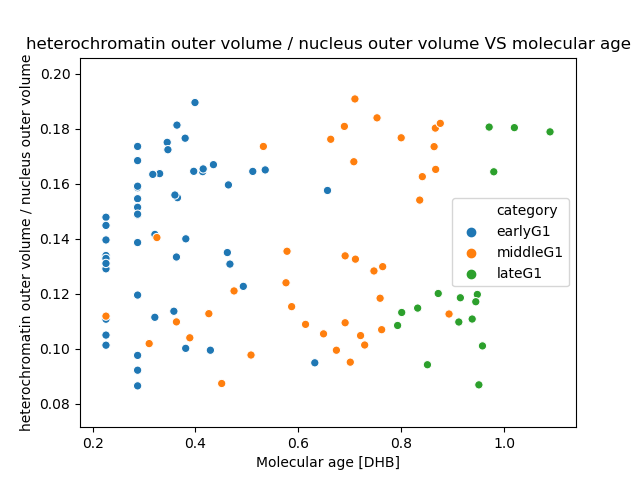

Text(0.5, 1.0, 'heterochromatin outer volume / nucleus outer volume VS molecular age')

In [55]:
%matplotlib notebook
datand['temp']=datand.outer_vol_het/datand.outer_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin outer volume / nucleus outer volume')
plt.title('heterochromatin outer volume / nucleus outer volume VS molecular age')

## 20. 	How is MCM signal in outer core changing with molecular age? 

<IPython.core.display.Javascript object>


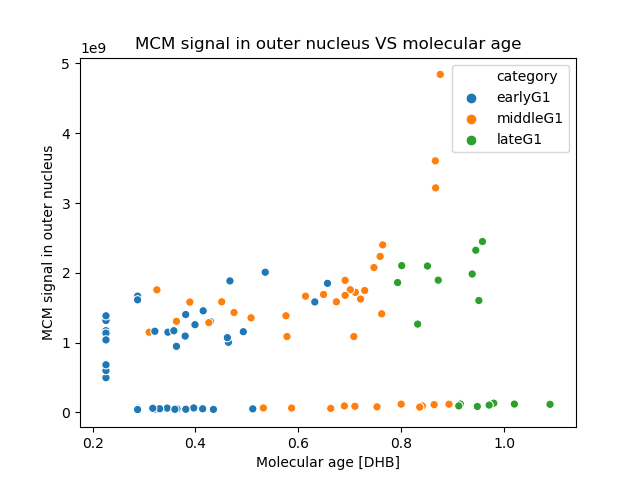

Text(0.5, 1.0, 'MCM signal in outer nucleus VS molecular age')

In [56]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_total',data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer nucleus')
plt.title('MCM signal in outer nucleus VS molecular age')

## 21. 	How is MCM signal changing in outer heterochromatin with molecular age?

<IPython.core.display.Javascript object>


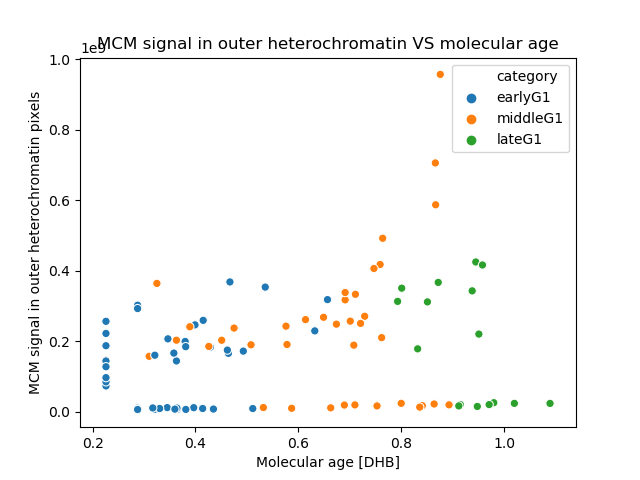

Text(0.5, 1.0, 'MCM signal in outer heterochromatin VS molecular age')

In [57]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_het',data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer heterochromatin pixels')
plt.title('MCM signal in outer heterochromatin VS molecular age')

## 22. 	How is MCM signal changing in outer euchromatin with molecular age?

<IPython.core.display.Javascript object>


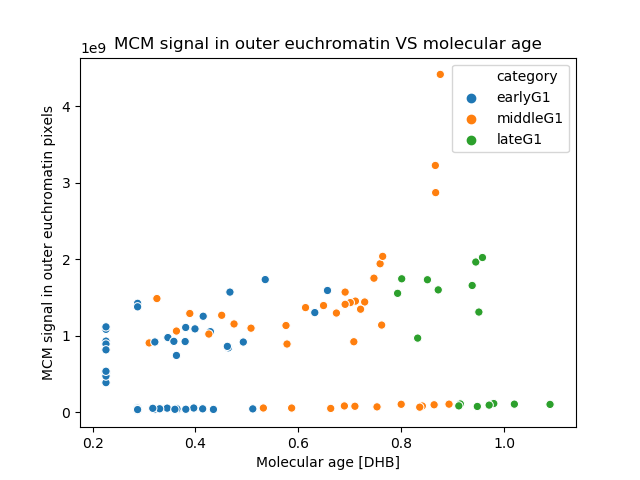

Text(0.5, 1.0, 'MCM signal in outer euchromatin VS molecular age')

In [58]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_eu',data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer euchromatin pixels')
plt.title('MCM signal in outer euchromatin VS molecular age')

## 23.	How does a proportion of MCM loaded in outer heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


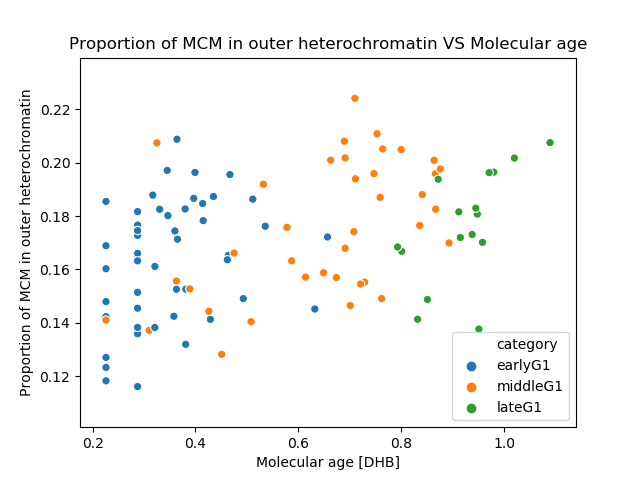

Text(0.5, 1.0, 'Proportion of MCM in outer heterochromatin VS Molecular age')

In [59]:
%matplotlib notebook
datand['temp']=datand.outer_mcm_het/datand.outer_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in outer heterochromatin')
plt.title('Proportion of MCM in outer heterochromatin VS Molecular age')

## 24.	How does a proportion of MCM loaded in outer euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


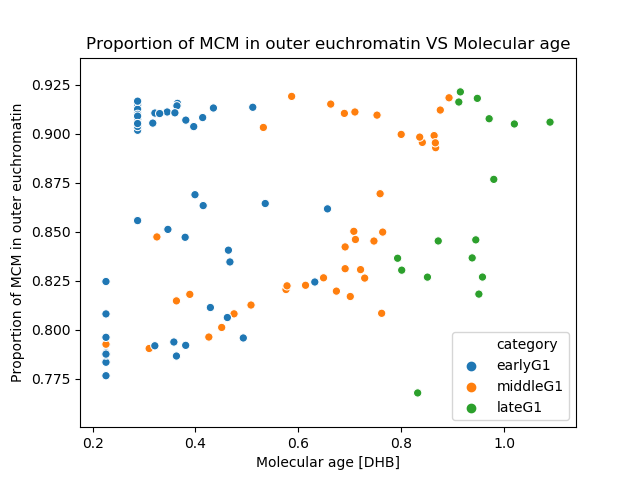

Text(0.5, 1.0, 'Proportion of MCM in outer euchromatin VS Molecular age')

In [60]:
%matplotlib notebook
datand['temp']=datand.outer_mcm_eu/datand.outer_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in outer euchromatin')
plt.title('Proportion of MCM in outer euchromatin VS Molecular age')

## 25.	How does MCM/DAPI in outer shell changes in molecular time?

<IPython.core.display.Javascript object>


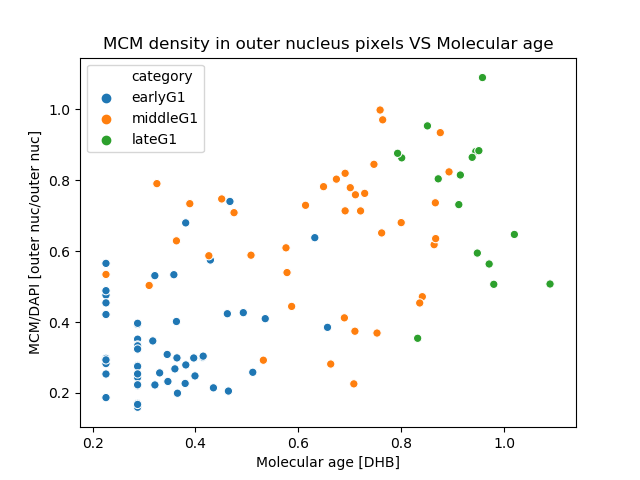

Text(0.5, 1.0, 'MCM density in outer nucleus pixels VS Molecular age')

In [61]:
%matplotlib notebook
datand['temp']=datand.outer_mcm_total/datand.outer_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [outer nuc/outer nuc]')
plt.title('MCM density in outer nucleus pixels VS Molecular age')

## 26.	How does MCM/DAPI changes in outer heterochromatin molecular time?

<IPython.core.display.Javascript object>


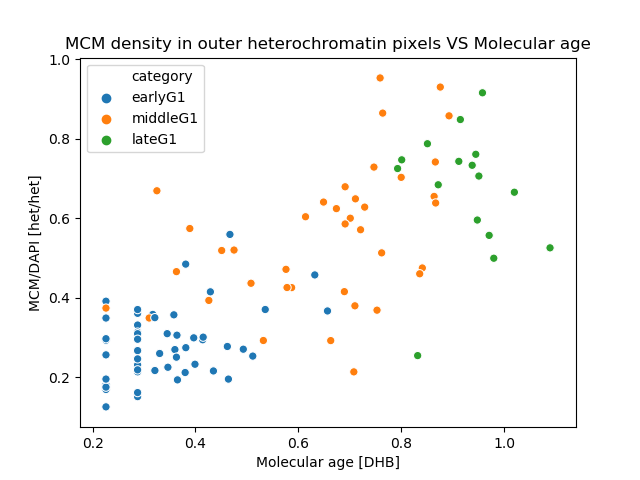

Text(0.5, 1.0, 'MCM density in outer heterochromatin pixels VS Molecular age')

In [62]:
%matplotlib notebook
datand['temp']=datand.outer_mcm_het/datand.outer_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in outer heterochromatin pixels VS Molecular age')

## 27. 	How does MCM/DAPI changes in outer euterochromatin molecular time?

<IPython.core.display.Javascript object>


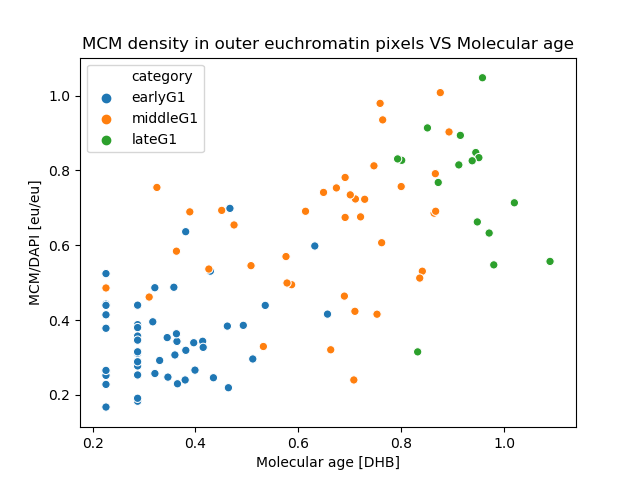

Text(0.5, 1.0, 'MCM density in outer euchromatin pixels VS Molecular age')

In [63]:
%matplotlib notebook
datand['temp']=datand.outer_mcm_eu/datand.outer_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=datand.loc[((datand.day!='d20190625') & (datand.day!='d201907012') &
                                                           ['G1' in x for x in datand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in outer euchromatin pixels VS Molecular age')